# Question 1
### we will start with importing necessary libraries and the data file

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
%matplotlib inline

In [3]:
df = pd.read_csv('/Users/dimagoroh/Desktop/data_vis/big_file.csv', low_memory=False)


## now we will do some data cleaning starting with dropping the two empty columns
## turning our time column to datetime object so that we can easily extract the year,hour etc

In [4]:
df=df.drop(['downloadSpeed', 'uploadSpeed'], axis=1)
df = df.dropna()
df["time"] = df['date'].astype(str) + " " +df["hour"]
df['time'] = pd.to_datetime(df["time"])
df['year']=df['time'].dt.year
df['hour_time']=df['time'].dt.hour

### now we will start exploring our data, at first we will build a plot of time vs speed 
### with the first plot we can already get a clear understanding of our data and if it changes with the year, but to get a better sense, the data can be shown as a line plot
### our data set has very hight verianse of measurement and a lot of duplicate measurement values at each mesuring point.
### so we need to scale the data, using avarage on a high variance data set in not a good idia because avarage is sensetive to high outliers, so in this case i opted to use median

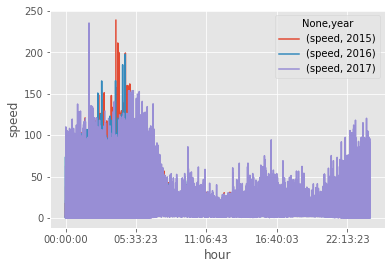

In [57]:
plt.style.use('ggplot')
pivot_df=df[['time','year']]
%matplotlib inline
import matplotlib.pyplot as plt
df.pivot_table(index='hour', columns='year',
                    aggfunc={'speed':'median'}).plot()
plt.ylabel('speed');

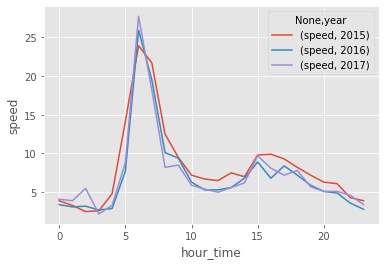

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
df.pivot_table(index='hour_time', columns='year',
                    aggfunc={'speed':'median'}).plot()
plt.ylabel('speed');

### as we can see the general relationship between the speed and time is that as we go later in the day the speed decreases, which is logical if we think about it because more and more people### connect ### to the network, the network need to handle more load so speed will drop
### in general the best time of day to connect would be in the early morning time 5-6 am 

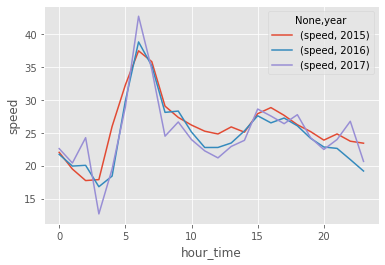

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
df.pivot_table(index='hour_time', columns='year',
                    aggfunc={'speed':'mean'}).plot()
plt.ylabel('speed');

In [15]:
df.head()

,date,hour,lat,long,signal,network,operator,status,description,net,...,precission,provider,activity,postal_code,town_name,position_geom,row_num,time,year,hour_time
0,2016-06-18,14:21:46,41.54022,2.45013,19,movistar,movistar,2,STATE_EMERGENCY_ONLY,4G,...,24.0,gps,ON_FOOT,81213.0,Mataró,POINT(2.45013 41.54022),7491330,2016-06-18 14:21:46,2016,14
1,2016-06-18,14:21:55,41.23720,1.75399,14,movistar,Movistar,2,STATE_EMERGENCY_ONLY,4G,...,14.0,gps,IN_VEHICLE,82310.0,Sant Pere de Ribes,POINT(1.75399 41.2372),7491333,2016-06-18 14:21:55,2016,14
2,2016-06-18,14:22:01,42.41164,1.84664,5,movistar,Movistar,2,STATE_EMERGENCY_ONLY,3G,...,24.0,fused,STILL,170789.0,Ger,POINT(1.84664 42.41164),7491336,2016-06-18 14:22:01,2016,14
3,2016-06-18,14:22:21,42.21912,2.55298,3,movistar,Movistar,2,STATE_EMERGENCY_ONLY,4G,...,25.0,gps,TILTING,171851.0,Sant Joan les Fonts,POINT(2.55298 42.21912),7491339,2016-06-18 14:22:21,2016,14
4,2016-06-18,14:22:27,41.66729,1.29566,20,movistar,Movistar,2,STATE_EMERGENCY_ONLY,2G,...,6.0,gps,IN_VEHICLE,250729.0,Cervera,POINT(1.29566 41.66729),7491342,2016-06-18 14:22:27,2016,14


In [16]:
df['operator'] = df['operator'].str.upper()


In [17]:
df.groupby(['operator'])['operator'].count().sort_values(ascending=False).head(10)

operator
MOVISTAR                     3886560
VODAFONE ES                  2480082
ORANGE                       1803490
JAZZTEL                       427701
PEPEPHONE                     369030
YOIGO                         336820
RACC                          139389
SIMYO                         127776
ORANGE SP                      95130
TELEFONICA MOVILES ESPANA      45523
Name: operator, dtype: int64

# question 2
## we will start with exploring our. data, because the question asks us to compare between diffrent operators the easies way to quickly do that would be with a pivot table.
## we were asked to compare with the main opereters so we will use the pareto rule and pick the top 3 operatores that represnt more then 80% of the total measurements of the data set

In [55]:
operator_list = ['MOVISTAR','VODAFONE ES','ORANGE']
filtered_df = df[df['operator'].isin(operator_list)]
filtered_df.pivot_table(index=["description","activity"], columns='operator',
                    aggfunc={'status':'count'})

status                      
operator                          MOVISTAR    ORANGE VODAFONE ES
description          activity                                   
STATE_EMERGENCY_ONLY IN_VEHICLE  1937454.0  861897.0   1163499.0
                     ON_BICYCLE    71824.0   25355.0     48598.0
                     ON_FOOT      633832.0  349043.0    466610.0
                     STILL        360593.0  164533.0    228909.0
                     TILTING      330173.0  148398.0    212153.0
                     UNKNOWN      198286.0   91876.0    138968.0
STATE_IN_SERVICE     IN_VEHICLE    60528.0   37012.0     28684.0
                     ON_BICYCLE     3353.0     977.0      1532.0
                     ON_FOOT       48419.0   20235.0     27815.0
                     STILL        120311.0   56156.0     94938.0
                     TILTING       79043.0   29636.0     40825.0
                     UNKNOWN       38989.0   16829.0     23297.0
STATE_OUT_OF_SERVICE IN_VEHICLE        5.0       3.0         4.0
                     ON_FOOT           5.0       2.0         NaN
                     STILL             6.0       NaN        40.0
                     TILTING           5.0       3.0         NaN
                     UNKNOWN           3.0       2.0         5.0
STATE_POWER_OFF      IN_VEHICLE     2264.0     899.0      1842.0
                     ON_BICYCLE       14.0      11.0        23.0
                     ON_FOOT         461.0     140.0       514.0
                     STILL           362.0     128.0       630.0
                     TILTING         382.0     243.0       789.0
                     UNKNOWN         248.0     112.0       407.0

## after we had a look at the data set and we can see that we have no null values in the "STATE_IN_SERVICE" state, we can move on and calculate our dependent probability 
## we will do that for each group, by useing group by and addint a calculated column.
### we can see from the data that if we look at each operator the activity that has the highst chnace to be "STATE_IN_SERVICE" is "STILL" for every operator 
### the activity that has the lowest probability to be "STATE_IN_SERVICE" is "ON_BICYCLE"

In [53]:
filtered_df.groupby(['operator','description'])['activity'].value_counts()
data=filtered_df.groupby(['operator','description'])['activity'].value_counts() / filtered_df.groupby(['operator','description'])['activity'].count()
data.head(60)

operator     description           activity  
MOVISTAR     STATE_EMERGENCY_ONLY  IN_VEHICLE    0.548518
                                   ON_FOOT       0.179446
                                   STILL         0.102088
                                   TILTING       0.093476
                                   UNKNOWN       0.056137
                                   ON_BICYCLE    0.020334
             STATE_IN_SERVICE      STILL         0.343115
                                   TILTING       0.225423
                                   IN_VEHICLE    0.172620
                                   ON_FOOT       0.138086
                                   UNKNOWN       0.111193
                                   ON_BICYCLE    0.009562
             STATE_OUT_OF_SERVICE  STILL         0.250000
                                   IN_VEHICLE    0.208333
                                   ON_FOOT       0.208333
                                   TILTING       0.208333
                          

### lets explore the data set as a whole and not divided by operators
### we can see that activity "STILL" has the highest probability of for "STATE_IN_SERVICE" and activity "ON BICYCLE" has the lowest probability
### so as far as the main operators are censored there is no difference in conditional probability

In [56]:
filtered_df.groupby('description')['activity'].value_counts()
filtered_df.groupby('description')['activity'].value_counts() / filtered_df.groupby('description')['activity'].count()

description           activity  
STATE_EMERGENCY_ONLY  IN_VEHICLE    0.533214
                      ON_FOOT       0.195033
                      STILL         0.101458
                      TILTING       0.092939
                      UNKNOWN       0.057741
                      ON_BICYCLE    0.019615
STATE_IN_SERVICE      STILL         0.372513
                      TILTING       0.205199
                      IN_VEHICLE    0.173247
                      ON_FOOT       0.132407
                      UNKNOWN       0.108588
                      ON_BICYCLE    0.008046
STATE_OUT_OF_SERVICE  STILL         0.554217
                      IN_VEHICLE    0.144578
                      UNKNOWN       0.120482
                      TILTING       0.096386
                      ON_FOOT       0.084337
STATE_POWER_OFF       IN_VEHICLE    0.528567
                      TILTING       0.149329
                      STILL         0.118281
                      ON_FOOT       0.117753
                      

In [23]:
import shapefile as shp


In [24]:
%matplotlib inline


In [25]:
import pygal


In [26]:
worldmap =  pygal.maps.world.World()


In [27]:
df.head()

,date,hour,lat,long,signal,network,operator,status,description,net,...,precission,provider,activity,postal_code,town_name,position_geom,row_num,time,year,hour_time
0,2016-06-18,14:21:46,41.54022,2.45013,19,movistar,MOVISTAR,2,STATE_EMERGENCY_ONLY,4G,...,24.0,gps,ON_FOOT,81213.0,Mataró,POINT(2.45013 41.54022),7491330,2016-06-18 14:21:46,2016,14
1,2016-06-18,14:21:55,41.23720,1.75399,14,movistar,MOVISTAR,2,STATE_EMERGENCY_ONLY,4G,...,14.0,gps,IN_VEHICLE,82310.0,Sant Pere de Ribes,POINT(1.75399 41.2372),7491333,2016-06-18 14:21:55,2016,14
2,2016-06-18,14:22:01,42.41164,1.84664,5,movistar,MOVISTAR,2,STATE_EMERGENCY_ONLY,3G,...,24.0,fused,STILL,170789.0,Ger,POINT(1.84664 42.41164),7491336,2016-06-18 14:22:01,2016,14
3,2016-06-18,14:22:21,42.21912,2.55298,3,movistar,MOVISTAR,2,STATE_EMERGENCY_ONLY,4G,...,25.0,gps,TILTING,171851.0,Sant Joan les Fonts,POINT(2.55298 42.21912),7491339,2016-06-18 14:22:21,2016,14
4,2016-06-18,14:22:27,41.66729,1.29566,20,movistar,MOVISTAR,2,STATE_EMERGENCY_ONLY,2G,...,6.0,gps,IN_VEHICLE,250729.0,Cervera,POINT(1.29566 41.66729),7491342,2016-06-18 14:22:27,2016,14


In [28]:
BBox = ((df.long.min(),   df.long.max(),      
         df.lat.min(), df.lat.max()))
print(BBox)

(0.16541, 3.33176, 40.52332, 42.85537)


In [29]:
ruh_m = plt.imread('/Users/dimagoroh/Desktop/data_vis/map.png')


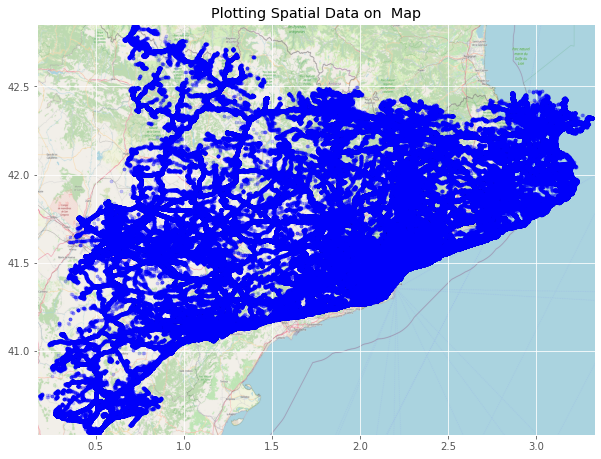

In [30]:
fig, ax = plt.subplots(figsize = (10,9))
ax.scatter(df.long, df.lat, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on  Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [31]:
import plotly.express as px

In [32]:
fig = px.choropleth(df, locations="iso_code",
                    color="new_cases",
                    hover_name="location",
                    animation_frame="date",
                    title = "Covid Cases plotted using Plotly",                 color_continuous_scale=px.colors.sequential.PuRd)
 
 


ValueError: Value of 'hover_name' is not the name of a column in 'data_frame'. Expected one of ['date', 'hour', 'lat', 'long', 'signal', 'network', 'operator', 'status', 'description', 'net', 'speed', 'satellites', 'precission', 'provider', 'activity', 'postal_code', 'town_name', 'position_geom', 'row_num', 'time', 'year', 'hour_time'] but received: location

In [33]:
import geopandas as gpd


In [34]:
sf = shp.Reader('/Users/dimagoroh/Desktop/data_vis/Límits administratius municipals de Catalunya/geo_export_5a50c033-7396-4fbc-b9a5-73ca0fcc95a4.shp')

In [35]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
%matplotlib inline


In [37]:

sf = shp.Reader('/Users/dimagoroh/Desktop/data_vis/shapefiles_catalunya_comarcas/shapefiles_catalunya_comarcas.shp')

In [182]:
def calc_color(data, color=None):
        if color   == 1: 
            color_sq =['#dadaebFF','#bcbddcF0','#9e9ac8F0','#807dbaF0','#6a51a3F0','#54278fF0'];
            colors = 'Purples';
        elif color == 2: 
            color_sq =['#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#253494']; 
            colors = 'YlGnBu';
        elif color == 3: 
            color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd','#969696','#636363','#252525']; 
            colors = 'Greys';
        elif color == 9: 
            color_sq =['#ff0000','#ff0000','#ff0000','#ff0000','#ff0000','#ff0000']
        else:            
            color_sq =['#ffffd4','#fee391','#fec44f','#fe9929','#d95f0e','#993404']; 
            colors = 'YlOrBr';
        new_data, bins = pd.qcut(data, 6, retbins=True, 
        labels=list(range(6)))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
            for i in range(6):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+
                       " => "+str(int(bins[i+1])-1), end =" ")
            print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;

In [323]:
def plot_comunas_data(sf, title, nom_muni, data=None, 
                      color=None, print_id=False):
    '''
    Plot map with selected comunes, using specific color
    '''
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    comuna_id = []
    for i in nom_muni:
        i = sf(i).upper()
        comuna_id.append(df[df.nom_muni == 
                            i.upper()].index.values()[0])
    plot_map_fill_multiples_ids_tone(sf, title, comuna_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9));

In [324]:
def plot_map_fill_multiples_ids_tone(sf, title, comuna,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')

        for id in comuna:
            shape_ex = sf.shape(id)
            x_lon = np.zeros((len(shape_ex.points),1))
            y_lat = np.zeros((len(shape_ex.points),1))
            for ip in range(len(shape_ex.points)):
                x_lon[ip] = shape_ex.points[ip][0]
                y_lat[ip] = shape_ex.points[ip][1]
            ax.fill(x_lon,y_lat, color_ton[comuna.index(id)])
            if print_id != False:
                x0 = np.mean(x_lon)
                y0 = np.mean(y_lat)
                plt.text(x0, y0, id, fontsize=10)
        if (x_lim != None) & (y_lim != None):     
            plt.xlim(x_lim)
            plt.ylim(y_lim)
        

In [325]:
census_17 = pd.read_csv('/Users/dimagoroh/Desktop/data_vis/big_file.csv', low_memory=False)

In [326]:
census_17=census_17.groupby(['town_name'])['speed'].median().sort_values(ascending=False).reset_index(name='spead')

In [327]:
census_17['town_name'] = census_17['town_name'].str.upper()
census_17.rename(columns = {'town_name':'nom_muni'}, inplace = True)



In [250]:
census_17.head()

,nom_muni,spead
0,VILADASENS,116.70
1,RIBERA D'ONDARA,114.20
2,BANYERES DEL PENEDÈS,114.10
3,ESTARÀS,113.65
4,L'ALBI,113.30



1: 0 => 2 
2: 3 => 7 
3: 8 => 17 
4: 18 => 42 
5: 43 => 67 
6: 68 => 115 

   1   2   3   4   5   6


TypeError: 'Reader' object is not callable

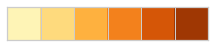

In [328]:
title = 'speed median'
data = census_17.spead
names = census_17.nom_muni
plot_comunas_data(sf, title, names, data, 4, True)

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11744914 entries, 0 to 11744913
Data columns (total 21 columns):
 #   Column         Dtype  
---  ------         -----  
 0   date           object 
 1   hour           object 
 2   lat            float64
 3   long           float64
 4   signal         int64  
 5   network        object 
 6   operator       object 
 7   status         int64  
 8   description    object 
 9   net            object 
 10  speed          float64
 11  satellites     float64
 12  precission     float64
 13  provider       object 
 14  activity       object 
 15  downloadSpeed  float64
 16  uploadSpeed    float64
 17  postal_code    float64
 18  town_name      object 
 19  position_geom  object 
 20  row_num        int64  
dtypes: float64(8), int64(3), object(10)
memory usage: 1.8+ GB


In [38]:
df.pivot_table(index=['town_name'],values=['speed','satellites','signal'],aggfunc='median').sort_values(by=['speed','signal'],ascending=False).head(60)

,satellites,signal,speed
town_name,,,
Viladasens,6.0,16.0,116.80
Ribera d'Ondara,7.0,13.0,114.40
Banyeres del Penedès,6.0,13.0,114.00
Fogars de la Selva,6.0,13.0,113.40
l'Albi,6.0,14.0,113.20
Estaràs,6.0,12.0,112.85
Santa Maria d'Oló,6.0,10.0,108.80
Castellnou de Seana,6.0,12.0,108.75
Argençola,6.0,15.0,107.20


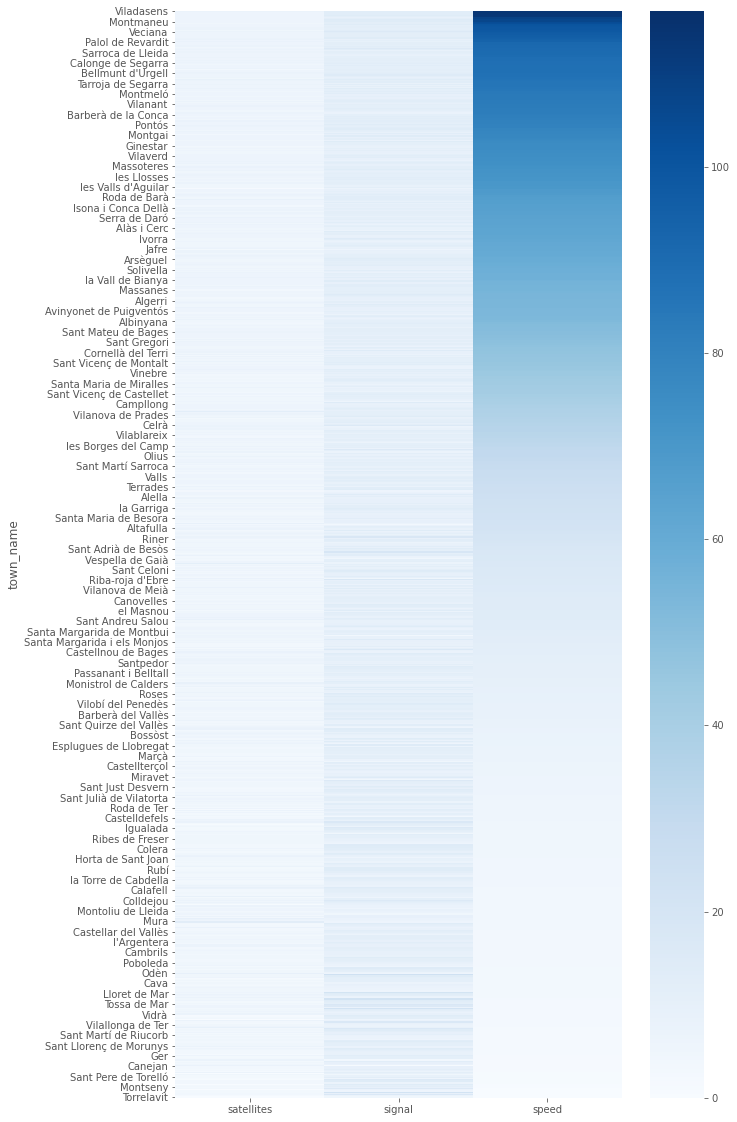

In [39]:
pivot = df.pivot_table(index=['town_name'],values=['speed','satellites','signal'],aggfunc='median').sort_values(by=['speed','signal'],ascending=False)
fig,ax=plt.subplots(figsize=(10,20))
sns.heatmap(pivot,cmap="Blues",ax=ax)
plt.show()

In [40]:
df.pivot_table(index=['town_name'],values=['speed','satellites','signal'],aggfunc='median').sort_values(by=['speed','signal'],ascending=False)


,satellites,signal,speed
town_name,,,
Viladasens,6.0,16.0,116.8
Ribera d'Ondara,7.0,13.0,114.4
Banyeres del Penedès,6.0,13.0,114.0
Fogars de la Selva,6.0,13.0,113.4
l'Albi,6.0,14.0,113.2
...,...,...,...
la Pobla de Massaluca,3.0,22.0,0.3
Beuda,4.0,10.0,0.3
Fontcoberta,4.0,17.0,0.2


In [41]:

grou_df=df.groupby(['town_name'])['speed'].median().sort_values(ascending=False).reset_index(name='spead')
grou_df['town_name'].unique()

array(['Viladasens', "Ribera d'Ondara", 'Banyeres del Penedès',
       'Fogars de la Selva', "l'Albi", 'Estaràs', "Santa Maria d'Oló",
       'Castellnou de Seana', 'Argençola', 'Montmaneu',
       'Castellet i la Gornal', 'Vilagrassa', 'Jorba',
       'Sant Pere Sallavinera', 'la Pobla de Montornès', 'la Masó',
       'Castelldans', 'Aguilar de Segarra', 'Veciana',
       'la Bisbal del Penedès', 'Vallgorguina', 'Subirats', 'la Granada',
       "Sant Sadurní d'Osormort", 'Sanaüja', 'Argelaguer', 'Olvan',
       'Palol de Revardit', 'Balenyà', 'Castellví de la Marca', 'Alcanó',
       'Òdena', 'Golmés', 'Castellolí', 'Freginals',
       'els Hostalets de Pierola', 'Castellfollit de Riubregós',
       'Sarroca de Lleida', 'Malla', 'Vall-llobrega', 'Godall', 'Alfés',
       'Aiguaviva', 'Pujalt', "Vilanova de l'Aguda", 'Calonge de Segarra',
       'Pallejà', 'Fondarella', 'Rodonyà', 'Torrelameu', 'Caseres',
       'Artesa de Lleida', 'Riudellots de la Selva',
       'Caldes de Malavella'

In [65]:
top_speed_df_filtered = df[df['town_name'].isin(['Viladasens', "Ribera d'Ondara", 'Banyeres del Penedès',
       'Fogars de la Selva', "l'Albi", 'Estaràs', "Santa Maria d'Oló",
       'Castellnou de Seana', 'Argençola', 'Montmaneu',
       'Castellet i la Gornal', 'Vilagrassa', 'Jorba',
       'Sant Pere Sallavinera', 'la Pobla de Montornès', 'la Masó',
       'Castelldans', 'Aguilar de Segarra', 'Veciana',
       'la Bisbal del Penedès', 'Vallgorguina', 'Subirats', 'la Granada',
       "Sant Sadurní d'Osormort", 'Sanaüja', 'Argelaguer', 'Olvan',
       'Palol de Revardit', 'Balenyà', 'Castellví de la Marca', 'Alcanó'])]


In [66]:
Box = ((top_df_filtered.long.min(),   top_df_filtered.long.max(),      
         top_df_filtered.lat.min(), top_df_filtered.lat.max()))
print(BBox)

NameError: name 'top_df_filtered' is not defined

In [ ]:
top_df=fig, ax = plt.subplots(figsize = (10,9))
ax.scatter(top_df_filtered.long, top_df_filtered.lat, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on  Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [45]:
slow_speed_df_filtered = df[df['town_name'].isin(['els Hostalets de Pierola', 'Castellfollit de Riubregós',
       'Sarroca de Lleida', 'Malla', 'Vall-llobrega', 'Godall', 'Alfés',
       'Aiguaviva', 'Pujalt', "Vilanova de l'Aguda", 'Calonge de Segarra',
       'Pallejà', 'Fondarella', 'Rodonyà', 'Torrelameu', 'Caseres',
       'Artesa de Lleida', 'Riudellots de la Selva',
       'Caldes de Malavella', "Bellmunt d'Urgell", 'Garrigàs',
       'el Pla de Santa Maria', 'Bàscara', 'Siurana', 'Vila-rodona',
       'Granyanella', 'Camarles', 'Maçanet de la Selva',
       'Tarroja de Segarra', 'Verdú', 'Biosca', "l'Ametlla de Mar",
       'Llobera', 'Copons', 'Ossó de Sió', 'Foradada', 'Penelles',
       'Montmeló', 'Cervià de Ter', 'Menàrguens', 'Pedret i Marzà',
       'Oliola', 'la Riera de Gaià', 'Figaró-Montmany', "l'Ampolla",
       'Alcoletge', 'Vilanant', 'Orís', 'Sant Ferriol', "l'Aldea",
       'la Pobla de Claramunt', 'Mont-roig del Camp', 'Vinaixa', 'Tarrés',
       'Castellfollit del Boix', 'Barberà de la Conca', 'Avinyó',
       'Corbins', 'Centelles', 'Balsareny', 'Tagamanent', 'els Guiamets',
       'Alcover', 'Tona', 'Pontós', 'Aldover', 'Torrebesses',
       'Castelló de Farfanya', 'Sidamon', 'Biure', 'Rasquera',
       'Pinell de Solsonès', 'Gironella', 'Montgai',
       "l'Espluga de Francolí", "la Tallada d'Empordà", 'Soses',
       "Bellcaire d'Urgell", 'Muntanyola', 'Cabanabona', 'Bassella',
       'Ginestar', 'Preixens', "Cabrera d'Anoia", 'la Sentiu de Sió',
       'Cabanelles', 'els Alamús', "Puigverd d'Agramunt", 'Cervera',
       'Canyelles', 'Vimbodí i Poblet', 'Alió', 'Vilaverd', 'el Papiol',
       'Saus, Camallera i Llampaies', 'Torroella de Fluvià', 'Llardecans',
       'Esparreguera', 'Garcia', 'Talavera', 'Massoteres', 'Duesaigües',
       'Callús', 'Sant Ramon', 'Ultramort', 'Cabra del Camp',
       'Almacelles', 'Argentona', 'les Llosses', 'Sant Julià de Ramis',
       'Vacarisses', 'la Galera', 'Sant Pere de Riudebitlles', 'la Pera',
       'Sils', 'Albatàrrec', 'Barbens', 'Benifallet',
       "les Valls d'Aguilar", 'Vidreres', 'el Milà', 'Pira',
       'Os de Balaguer', 'Vilabella', 'Vallfogona de Balaguer',
       'els Prats de Rei', 'el Bruc', 'Roda de Barà', 'Abrera', 'Bolvir',
       'Estamariu', 'Rajadell', 'Senterada', 'Ordis', 'Anglesola',
       'Sant Guim de la Plana', 'Isona i Conca Dellà',
       'Castellbell i el Vilar', 'Sant Jaume de Llierca', 'Brunyola',
       'Flaçà', 'Borrassà', 'Xerta', 'Sant Martí de Centelles', 'Nulles',
       'Serra de Daró', 'Sant Joan de Mollet', 'el Pont de Bar',
       'les Avellanes i Santa Linya', 'Santa Fe del Penedès', 'Nalec',
       'la Floresta', 'Vallmoll', 'Alàs i Cerc', 'les Borges Blanques',
       'Colomers', 'la Fatarella', 'Montcada i Reixac', 'Torres de Segre',
       "el Far d'Empordà", 'Masdenverge', 'Sant Feliu de Buixalleu',
       'Artesa de Segre', 'Ivorra', 'Bellpuig', 'Maià de Montcal',
       'Serinyà', 'Castellar de la Ribera', 'Térmens', 'Viladecavalls',
       'Puig-reig', 'Gurb', 'Jafre', "la Torre de l'Espanyol",
       'Cassà de la Selva', 'les Piles', 'Puiggròs', 'els Garidells',
       'Guardiola de Berguedà', 'Camarasa', "Ribera d'Urgellet",
       'Arsèguel', 'Pradell de la Teixeta', 'Riudecols', 'Castellgalí',
       'Crespià', 'Constantí', "l'Arboç", 'Oristà', 'Torrent',
       'Solivella', "Vandellòs i l'Hospitalet de l'Infant",
       'les Masies de Voltregà', 'Vallclara', "Santa Cristina d'Aro",
       'Vinyols i els Arcs', 'Castell de Mur', 'Vilajuïga',
       'la Vall de Bianya', 'Granyena de les Garrigues',
       'Sant Bartomeu del Grau', 'Ripollet', 'Sant Jordi Desvalls',
       'Perafort', 'Parlavà', 'Pont de Molins', 'Montgat', 'Gualta',
       'Massanes', 'Botarell', 'Fontanals de Cerdanya', 'Peramola',
       'Oliana', 'Creixell', 'Sant Martí Vell', 'Puigpelat', 'Algerri',
       'Garriguella', 'Viladamat', "Sant Llorenç d'Hortons", 'Talarn',
       'Llers', 'la Fuliola', 'Darnius', 'Cercs', 'les Valls de Valira',
       'Avinyonet de Puigventós', 'Rialp', 'Vilopriu',
       'Puigverd de Lleida', 'Sant Cugat Sesgarrigues', 'Castellbisbal',
       'Vilallonga del Camp', 'Gualba', 'Llambilles', 'Albinyana',
       'Ivars de Noguera', "Caldes d'Estrac", 'Vilamalla', 'Tornabous',
       'Maldà', 'Castellserà', 'la Roca del Vallès', 'Palafolls',
       'Sant Mateu de Bages', 'Sarrià de Ter', 'Vilaür', 'Corçà', 'Sora',
       'Fornells de la Selva', 'Llavorsí', 'Montagut i Oix',
       'Vilanova de la Barca', 'Sant Gregori', "Vilobí d'Onyar",
       'Alcarràs', 'Vilademuls', "Sant Martí d'Albars", 'Isòvol',
       'Olèrdola', 'Forallac', 'la Riba', 'Cornellà del Terri',
       "la Guingueta d'Àneu", 'Calders', 'Fortià', 'Torre-serona',
       'Tírvia', 'Juià', 'Corbera de Llobregat', 'Pau',
       'Sant Vicenç de Montalt', 'Agullana', 'Ullastret', 'Ciutadilla',
       'Santa Maria de Merlès', 'el Poal', 'el Cogul', 'Coll de Nargó',
       'Montornès del Vallès', 'Vinebre', 'Prat de Comte', 'Campelles',
       'Montferrer i Castellbò', 'Fígols i Alinyà', 'Alfarràs',
       'Parets del Vallès', 'Torrefarrera', 'Sant Pol de Mar',
       'Santa Maria de Miralles', 'Lladurs', 'Tordera', 'Santa Oliva',
       "l'Espunyola", 'Regencós', 'Navata', "Corbera d'Ebre",
       "l'Ametlla del Vallès", 'Sant Vicenç de Castellet',
       'Sant Fruitós de Bages', 'Bellprat', 'Vilanova del Vallès',
       'Folgueroles', 'Renau', 'Sant Pau de Segúries', 'el Masroig',
       'Badia del Vallès', 'Campllong', 'Peralada', 'Toses',
       'Avinyonet del Penedès', 'Baix Pallars', 'Cabrera de Mar',
       "Bellcaire d'Empordà", 'Fulleda', 'Casserres',
       'Vilanova de Prades', 'Urús', 'Maials', 'el Soleràs',
       'la Vilella Baixa', 'Juneda', 'Santa Bàrbara',
       'Sant Feliu de Pallerols', 'Guils de Cerdanya', 'Celrà', 'Llorac',
       'Juncosa', 'Sagàs', "la Palma d'Ebre", "Vallbona d'Anoia",
       'Santa Perpètua de Mogoda', 'la Portella', 'Riumors',
       'Figuerola del Camp', 'Vilablareix', 'Linyola', 'la Granadella',
       'la Secuita', 'Quart', "Santa Llogaia d'Àlguema", 'els Torms',
       'Móra la Nova', 'les Borges del Camp', 'Riudaura',
       'la Palma de Cervelló', 'Es Bòrdes', "l'Espluga Calba",
       'Torrefeta i Florejacs', 'Preixana', 'el Pont de Suert', 'Verges',
       'Olius', 'Sant Joan de Vilatorrada', 'Montesquiu', 'la Figuera',
       'Llanars', 'Arbeca', "l'Albagés", 'Palau-solità i Plegamans',
       'Santa Maria de Palautordera', 'Sant Martí Sarroca',
       'Sant Feliu de Codines', 'Bescanó', 'Vilalba Sasserra', 'Almenar',
       'Navàs', 'Vilanova de Segrià', "el Pont d'Armentera", 'Soriguera',
       'Valls', 'el Perelló', 'Ascó', 'Alcanar', "Castelló d'Empúries",
       'Prullans', 'Mont-ras', 'Vallcebre', "el Palau d'Anglesola",
       'Terrades', 'Mollet del Vallès', 'Sitges',
       'Sant Andreu de la Barca', 'la Vajol', 'Montmajor',
       'Cànoves i Samalús', 'Capmany', 'Olost', 'Alella', 'Vilamacolum',
       'Flix', 'Sant Jaume dels Domenys', 'Tiana', 'Riudarenes', 'Seva',
       'Palau-saverdera', 'Riu de Cerdanya', 'la Garriga',
       'la Pobla de Segur', 'Balaguer', 'Cervelló', 'Albesa',
       'Sant Miquel de Fluvià', 'les Cabanyes', 'Sant Agustí de Lluçanès',
       'la Nou de Gaià', 'Santa Maria de Besora', 'Montferri',
       'Llagostera', 'Premià de Dalt', 'Alguaire', 'Montclar', 'Cabó',
       'Bordils', 'Margalef', 'Altafulla', 'Cornudella de Montsant',
       'Calaf', 'Vilada', 'Arbúcies', 'Vilanova de Bellpuig',
       'Cervià de les Garrigues', 'Sant Pere de Ribes', "l'Estany",
       'Riner', 'Almatret', 'Amer', 'Martorell', 'Lles de Cerdanya',
       'Santa Maria de Corcó', 'Montbrió del Camp', 'els Plans de Sió',
       'Sant Hilari Sacalm', 'Collbató', 'Sant Adrià de Besòs',
       'Sant Esteve Sesrovires', 'Tivenys', 'Almoster',
       'Cerdanyola del Vallès', 'Ulldemolins', 'Collsuspina', 'Ulldecona',
       'Vespella de Gaià', 'Ponts', 'la Cellera de Ter', 'Forès',
       'Farrera', 'Cardona', 'Rupià', 'Canet de Mar',
       'Sant Vicenç de Torelló', 'Sant Celoni',
       'Santa Eulàlia de Riuprimer', 'la Bisbal de Falset', 'Calldetenes',
       'Lliçà de Vall', "Sant Jaume d'Enveja", "Vilanova d'Escornalbou",
       'Monistrol de Montserrat', 'Torroja del Priorat',
       "Riba-roja d'Ebre", "la Vall d'en Bas", 'la Selva del Camp',
       'Riudoms', 'Marganell', 'Sant Andreu de Llavaneres',
       'Pacs del Penedès', "l'Armentera", 'el Prat de Llobregat',
       'Vilanova de Meià', 'Tàrrega', 'Fonollosa', 'Molins de Rei',
       'Sudanell', 'Riells i Viabrea', 'Montblanc', 'Alp', 'Canovelles',
       'Benavent de Segrià', 'Vila-seca', 'Albons', 'Deltebre', 'Polinyà',
       'Orpí', 'Sant Vicenç dels Horts', 'Salàs de Pallars',
       'la Nou de Berguedà', 'el Masnou', 'Santa Eulàlia de Ronçana',
       'Organyà', 'Cabrils', 'Vilanova de Sau', 'Espot', 'Vilamòs',
       'Font-rubí', 'Sant Julià del Llor i Bonmatí', 'Sant Andreu Salou',
       'Cabanes', 'Sant Cebrià de Vallalta', 'Sant Julià de Cerdanyola',
       'Masllorenç', 'Sant Boi de Llobregat',
       'Sant Esteve de Palautordera', 'Guixers', 'el Morell',
       'Santa Margarida de Montbui', 'Alt Àneu', 'Sant Mori',
       'Boadella i les Escaules', 'Ripoll', 'Esponellà', 'Planoles',
       'la Llagosta', 'Das', 'Llinars del Vallès',
       'Santa Margarida i els Monjos', 'Santa Pau', "l'Aleixar",
       'Mollerussa', "Cruïlles, Monells i Sant Sadurní de l'Heura",
       'Tortosa', 'Espinelves', 'Guimerà', 'Castellnou de Bages',
       'Belianes', 'Alforja', 'Blancafort', 'la Quar', 'Bot',
       'Rocafort de Queralt', 'Ventalló', 'Borredà', 'Santpedor',
       'Clariana de Cardener', 'Mas de Barberans', "Ivars d'Urgell",
       'Manresa', 'Manlleu', 'Tarragona', 'les Franqueses del Vallès',
       'Sant Carles de la Ràpita', 'Passanant i Belltall',
       'Gimenells i el Pla de la Font', 'Garrigoles', 'Vallirana',
       'la Selva de Mar', 'els Omells de na Gaia', 'Bellvís',
       'Santa Coloma de Cervelló', 'la Jonquera', 'Monistrol de Calders',
       'Tavèrnoles', 'Maspujols', 'Gallifa', 'Llançà',
       'Santa Coloma de Queralt', 'Navès', 'Sallent', 'Hostalric',
       'Roses', 'Vilassar de Dalt', 'Montoliu de Segarra', 'Bonastre',
       'Sant Martí de Llémena', 'Castellvell del Camp',
       'les Masies de Roda', 'Sant Joan Despí', 'les Preses',
       'Vilobí del Penedès', 'Caldes de Montbui', 'Josa i Tuixén',
       'Cornellà de Llobregat', 'Calonge', 'Banyoles', 'Capolat',
       'Espolla', 'Sant Fost de Campsentelles', "Bell-lloc d'Urgell",
       'Salt', 'Sant Quintí de Mediona', 'Barberà del Vallès',
       'Vallfogona de Riucorb', 'Palau-sator', 'Fontanilles',
       'la Llacuna', "Lliçà d'Amunt", 'Sant Quirze del Vallès',
       'Sant Feliu de Llobregat', 'Porqueres', 'el Molar', 'Figueres',
       "la Seu d'Urgell", 'les Oluges', 'Castellar del Riu', 'Naut Aran',
       'Molló', 'Bossòst', 'el Brull', 'Sales de Llierca', 'Viladecans',
       'Benissanet', 'Tiurana', 'Torregrossa',
       'Santa Cecília de Voltregà', 'Esplugues de Llobregat',
       'Vilabertran', 'Santa Eugènia de Berga', 'Teià', 'Massalcoreig',
       'els Pallaresos', 'Lleida', 'Alfara de Carles',
       'la Pobla de Mafumet', 'Marçà', 'Sant Pere Pescador', 'Osor',
       'Llimiana', "l'Albiol", 'Campdevànol', 'Paüls', 'Prats i Sansor',
       'Aiguafreda', 'Martorelles', 'Castellterçol', 'la Canonja',
       'Pratdip', 'Artés', 'Prats de Lluçanès', 'Taradell', 'Ullà',
       'Sant Antoni de Vilamajor', 'Miravet', 'Vilafranca del Penedès',
       'Sunyer', 'Mollet de Peralada', 'el Vendrell', 'Campins', 'Salomó',
       'Riudecanyes', 'Torredembarra', 'Sant Just Desvern',
       'Arenys de Mar', 'el Pinell de Brai', 'Miralcamp', 'Terrassa',
       'Súria', 'Vila-sana', 'Sant Aniol de Finestres',
       'Olesa de Bonesvalls', 'Sant Julià de Vilatorta', 'Cunit',
       'Calella', 'Gavà', 'Sarral', 'Conesa', 'Granollers',
       'Sant Joan de les Abadesses', 'Vic', 'Roda de Ter',
       'Sant Martí Sesgueioles', 'la Vansa i Fórnols', 'Òrrius',
       'Santa Susanna', 'Gandesa', 'Vilassar de Mar',
       'Granyena de Segarra', 'Pardines', 'Sant Cugat del Vallès',
       'Montellà i Martinet', 'Mediona', 'Castelldefels', 'Granera',
       "la Granja d'Escarp", 'Santa Coloma de Gramenet',
       'la Baronia de Rialb', 'Seròs', 'Reus', 'Cubells', 'Mataró',
       'Igualada', 'Sant Llorenç Savall', 'Pontils', 'Susqueda', 'Àger',
       'Torelló', 'Gombrèn', 'Sant Pere de Vilamajor', 'Ribes de Freser',
       'Pineda de Mar', 'Rubió', 'Besalú', "l'Hospitalet de Llobregat",
       'Vielha e Mijaran', 'Vallbona de les Monges', 'Roquetes', 'Colera',
       'Barcelona', 'Sabadell', 'la Vall de Boí', 'Fígols', 'Blanes',
       'Perafita', 'Talamanca', 'Alòs de Balaguer', 'Horta de Sant Joan',
       'Savallà del Comtat', 'Dosrius', 'Girona', "Castellar de n'Hug",
       'Ogassa', 'Palafrugell', 'Pontons', 'Rubí', 'Fogars de Montclús',
       "Móra d'Ebre", 'Gelida', "Sant Sadurní d'Anoia",
       "Castell-Platja d'Aro", 'Badalona', 'Sant Joan les Fonts',
       'Esterri de Cardós', 'Bigues i Riells', 'Berga',
       'la Torre de Cabdella', 'Sobremunt', 'Aiguamúrcia',
       'Malgrat de Mar', 'Abella de la Conca', 'Gaià',
       'Llorenç del Penedès', 'la Torre de Claramunt', 'Bagà', 'Calafell',
       'Cardedeu', 'Carme', 'Camprodon', 'Conca de Dalt', 'Olot',
       'Mieres', 'Colldejou', 'Palamós', 'Alpens', 'Gavet de la Conca',
       'Sarroca de Bellera', 'la Pobla de Cérvoles', 'Bellvei',
       'Meranges', 'Gratallops', "Canet d'Adri",
       'Sant Esteve de la Sarga', 'Sant Miquel de Campmajor',
       'Montoliu de Lleida', 'la Molsosa', 'Bellver de Cerdanya',
       'Mont-ral', 'Sant Jaume de Frontanyà', 'Mura',
       'la Coma i la Pedra', 'el Lloar', 'Arres',
       'Santa Coloma de Farners', 'Masquefa', "la Bisbal d'Empordà",
       'el Vilosell', 'el Pont de Vilomara i Rocafort',
       'Castellar del Vallès', 'la Morera de Montsant', 'Rosselló',
       'Pals', 'la Febró', 'Olesa de Montserrat', 'Llívia',
       'Rupit i Pruit', 'Pinós', "l'Argentera", 'Porrera',
       'el Pla del Penedès', "l'Escala", 'Salou', 'Tavertet', 'Cadaqués',
       'la Sénia', 'Arenys de Munt', 'Sant Quirze Safaja', 'Cambrils',
       'Arnes', 'Viladrau', 'Sant Feliu de Guíxols', 'Setcases', 'Breda',
       'Torroella de Montgrí', 'Tremp', 'Sant Boi de Lluçanès',
       'el Catllar', 'Avià', 'Poboleda', 'Puigcerdà', 'Olivella',
       'els Omellons', 'Rabós', 'Guissona', 'Sant Hipòlit de Voltregà',
       'Santa Maria de Martorelles', 'Odèn', 'Cava',
       'Castellví de Rosanes', 'Sant Quirze de Besora', 'Sort',
       'Bellaguarda', 'Portbou', 'Vilanova i la Geltrú',
       'Torrelles de Llobregat', 'Torrelles de Foix', 'Begues', 'Foixà',
       'Montornès de Segarra', 'Matadepera', 'Lluçà',
       'Sant Climent Sescebes', 'Les', 'Sant Llorenç de la Muga',
       'Lloret de Mar', 'Bausen', 'Cantallops',
       'Castellfollit de la Roca', 'Bovera', 'Tossa de Mar', 'Torà',
       'Solsona', 'Falset', 'Capellades', 'Alins', 'Albanyà', 'Queralbs',
       'Lladó', 'Gósol', 'Lladorre', 'Saldes', 'Vidrà', 'el Rourell',
       'Piera', 'la Vilella Alta', 'Premià de Mar', 'Navarcles',
       'Cistella', "les Planes d'Hostoles", 'Vilallonga de Ter', 'Querol',
       'Amposta', 'Rellinars', 'Bellmunt del Priorat',
       'Sant Climent de Llobregat', 'Batea', 'Maçanet de Cabrenys',
       'Vilafant', "Esterri d'Àneu", 'Begur', 'Sant Martí de Riucorb',
       'Vila-sacra', 'Castellcir', 'Gisclareny', 'Sant Guim de Freixenet',
       'Cabacés', 'la Pobla de Lillet', 'Tortellà', 'Vilamaniscle',
       'Madremanya', 'Sant Llorenç de Morunys', 'Anglès', 'Cubelles',
       'Vall de Cardós', 'Sentmenat', 'Vilanova del Camí', 'Capafonts',
       'Sant Iscle de Vallalta', 'el Port de la Selva', 'Ger', 'Agramunt',
       "Castell de l'Areny", 'Alpicat', 'la Torre de Fontaubella',
       'Vallromanes', 'Sant Salvador de Guardiola', 'Canejan', 'Arbolí',
       'Vilaplana', 'Moià', 'Sant Martí de Tous', 'Capçanes',
       'Puigdàlber', 'Viver i Serrateix', 'Vilaller',
       'Sant Pere de Torelló', 'Tivissa', 'Ullastrell',
       'Sant Feliu Sasserra', 'Palau de Santa Eulàlia',
       'Vilalba dels Arcs', 'Vallfogona de Ripollès', 'el Montmell',
       'Camós', 'Montseny', 'Masarac', 'Prades', 'Aspa', 'Aitona',
       'la Pobla de Massaluca', 'Beuda', 'Bràfim', 'Fontcoberta',
       'Torrelavit'])]

In [46]:
Box = ((slow_speed_df_filtered.long.min(),   slow_speed_df_filtered.long.max(),      
         slow_speed_df_filtered.lat.min(), slow_speed_df_filtered.lat.max()))
print(BBox)

(0.16541, 3.33176, 40.52332, 42.85537)


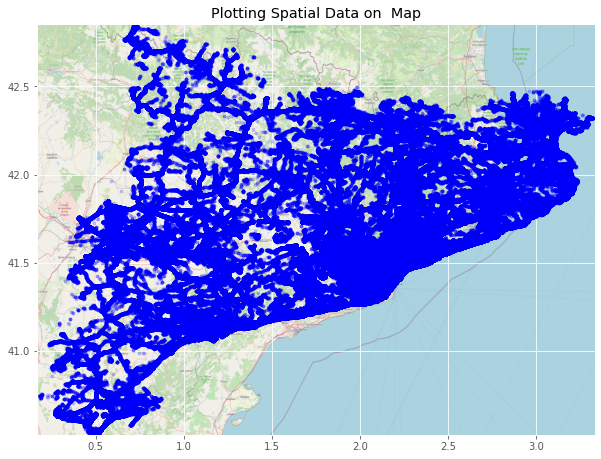

In [47]:
top_df=fig, ax = plt.subplots(figsize = (10,9))
ax.scatter(slow_speed_df_filtered.long, slow_speed_df_filtered.lat, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on  Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [48]:
conditions = [
    (df['net'] == "2G"),
    (df['net'] == "3G"),
    (df['net'] == "4G") 
]

values = [2,3,4]

df['net_number'] = np.select(conditions, values)

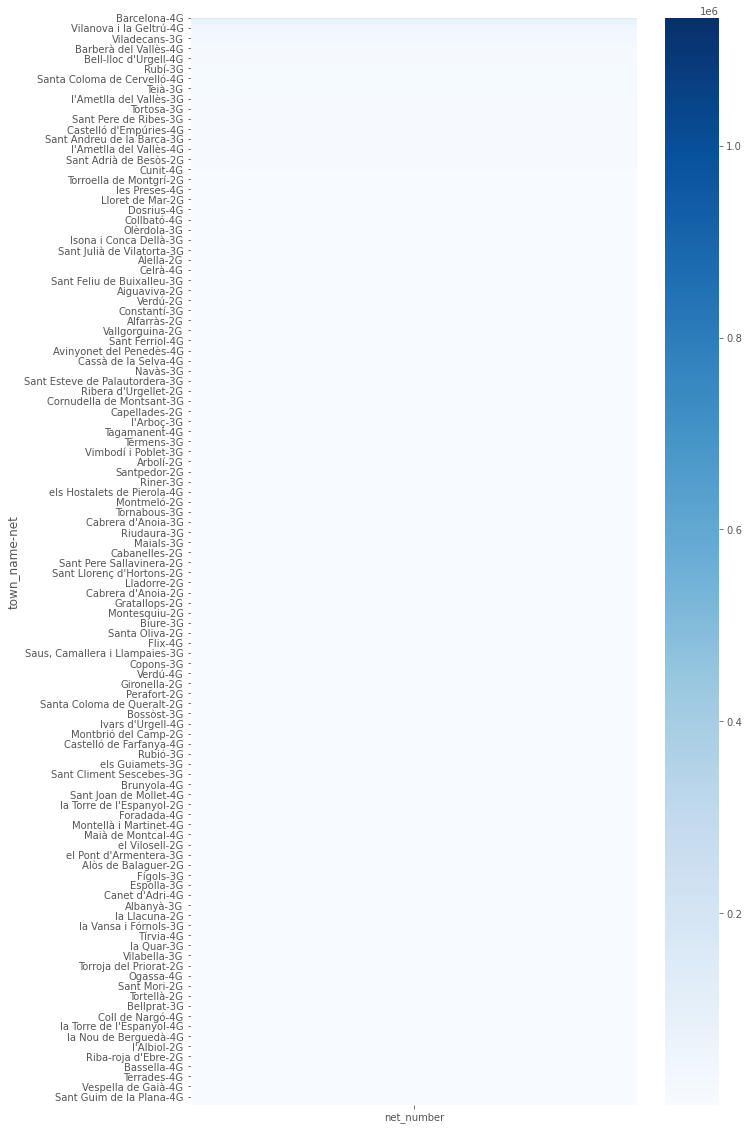

In [49]:
pivot = df.pivot_table(index=['town_name','net'],values=['net_number'],aggfunc={'net_number':'count'}).sort_values(by=['net_number'],ascending=False)
fig,ax=plt.subplots(figsize=(10,20))
sns.heatmap(pivot,cmap="Blues",ax=ax)
plt.show()

In [50]:
df.pivot_table(index=['town_name','net'],values=['net_number'],aggfunc='count').sort_values(by=['net_number'],ascending=False)

net_number
town_name                 net            
Barcelona                 4G      1133438
                          3G       640503
                          2G       238481
Lleida                    4G       154115
l'Hospitalet de Llobregat 4G       121501
...                                   ...
Juncosa                   4G            1
Fulleda                   4G            1
el Soleràs                4G            1
Gósol                     4G            1
Vallfogona de Riucorb     4G            1

[2804 rows x 1 columns]

In [51]:

network_filtered = df[df['net'].isin(['2G'])] 

In [52]:
Box = ((network_filtered.long.min(),   network_filtered.long.max(),      
         network_filtered.lat.min(), network_filtered.lat.max()))
print(BBox)

(0.16541, 3.33176, 40.52332, 42.85537)


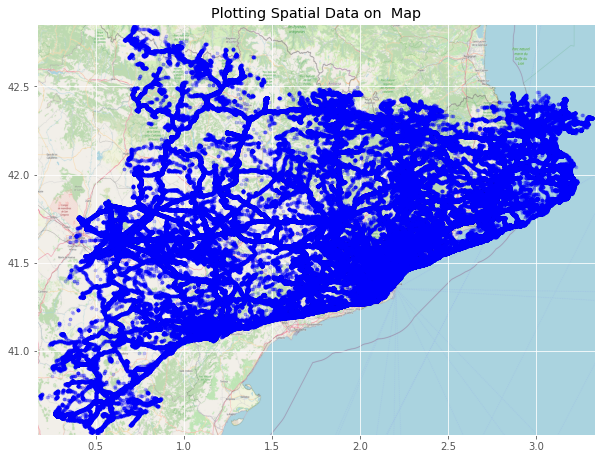

In [53]:
top_df=fig, ax = plt.subplots(figsize = (10,9))
ax.scatter(network_filtered.long, network_filtered.lat, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on  Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

(0.16541, 3.33176, 40.52332, 42.85537)


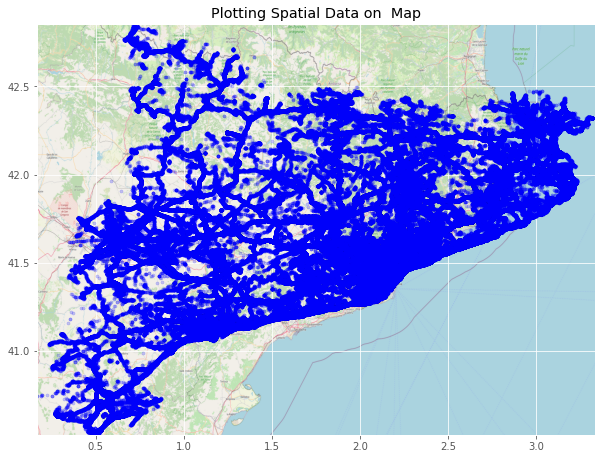

In [54]:
network_filtered = df[df['net'].isin(['3G'])]
Box = ((network_filtered.long.min(),   network_filtered.long.max(),      
         network_filtered.lat.min(), network_filtered.lat.max()))
print(BBox)
top_df=fig, ax = plt.subplots(figsize = (10,9))
ax.scatter(network_filtered.long, network_filtered.lat, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on  Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

(0.16541, 3.33176, 40.52332, 42.85537)


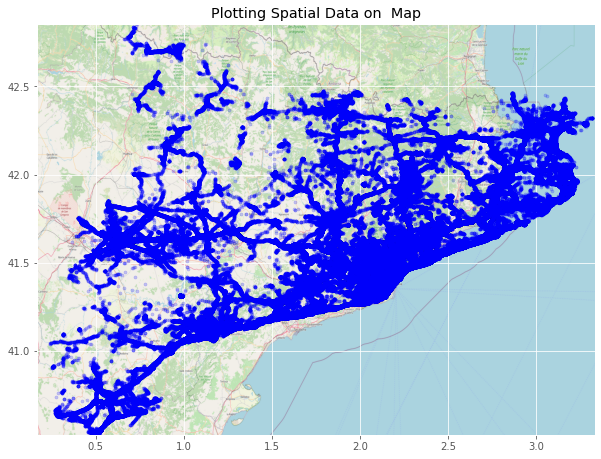

In [55]:
network_filtered = df[df['net'].isin(['4G'])]
Box = ((network_filtered.long.min(),   network_filtered.long.max(),      
         network_filtered.lat.min(), network_filtered.lat.max()))
print(BBox)
top_df=fig, ax = plt.subplots(figsize = (10,9))
ax.scatter(network_filtered.long, network_filtered.lat, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on  Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [59]:
df.pivot_table(index=['net',],values=['net_number'],aggfunc='count').sort_values(by=['net_number'],ascending=False)

,net_number
net,
4G,4246566
3G,3710505
2G,2091209


In [63]:
bar_plot=df.pivot_table(index=['town_name','net',],values=['net_number'],aggfunc='count').sort_values(by=['net_number'],ascending=False).head(10)

<AxesSubplot:xlabel='town_name,net'>

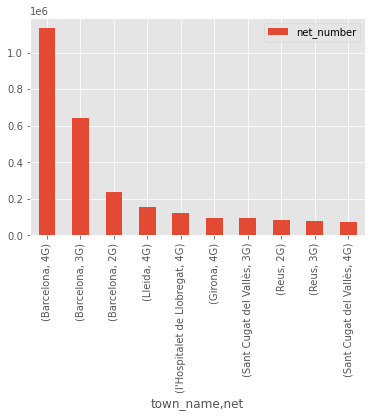

In [64]:
bar_plot.plot(kind="bar")